In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [3]:
data = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')

Since this is a huge dataset first it's better to remove as much unnecessary data as we can.

Let's look at the rows and remove the unwanted ones.

Some of the columns that don't look that useful for analysis are:-
1. url
2. region_url
3. image_url
4. description
5. county (all null values)

In [4]:
#dropping unnecessary columns
data.drop(['url','region_url','image_url','description','county'], axis=1, inplace=True)

# How price is distributed?

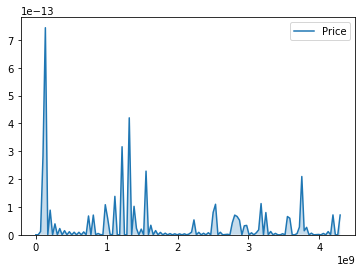

In [5]:
sns.kdeplot(data=data['price'],label="Price" ,shade=True)

# Which brand cars are most expensive? ----> Toyota

In [6]:
price = data.groupby('manufacturer')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail(10)
fig = px.pie(price,
             values="price",
             names="manufacturer",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which brand cars are cheapest?-----> Land Rover (other than the zero values)

In [7]:
price = data.groupby('manufacturer')['price'].min().reset_index()
price  = price.sort_values("price")
price = price[price['price']!=0] #this is necessary so that zero price values are not considered
price = price.head(10)
fig = px.pie(price,
             values="price",
             names="manufacturer",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which % of expensive cars are in excellent condition?-----> 51.8%

In [8]:
price = data.groupby('condition')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail(10)
fig = px.pie(price,
             values="price",
             names="condition",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of the odometer

But before checking the odometer distribution it's absolutely necessary to know what does the column signify. I didn't know that.

So I did a quick google search and came up with the conclusion that:

Odometer is the device that measures how much distance a car has travelled from the day it was made. 
So the column contains the distance travelled by a car before being scraped.

Now lets see the distribution.

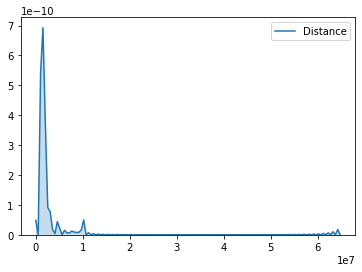

In [9]:
sns.kdeplot(data=data['odometer'], label="Distance", shade=True)

# Which fuel type cars are most expensive?------> gas

In [10]:
price = data.groupby('fuel')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail()
fig = px.pie(price,
             values="price",
             names="fuel",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which paint color is popular?------> White

In [11]:
color = data.loc[:,['paint_color']]
color['count'] = color.groupby(color['paint_color'])['paint_color'].transform('count')
color = color.drop_duplicates()
color = color.sort_values("count",ascending = False)
color = color.head(10)
fig = px.pie(color,
             values="count",
             names="paint_color",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

Let's drop some more columns which I find not important.

1. id (unique for each row in dataset)
2. vin (unique id for each car)

In [12]:
data.drop(['id','vin'], axis=1, inplace=True)

# What is the most common cylinder count? ------> 6 cylinders

In [15]:
cyl = data.loc[:,['cylinders']]
cyl['count'] = cyl.groupby(cyl['cylinders'])['cylinders'].transform('count')
cyl = cyl.drop_duplicates()
cyl = cyl.sort_values("count",ascending = False)
cyl = cyl.head(10)
fig = px.pie(cyl,
             values="count",
             names="cylinders",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# What is the % of cars which have title_status clean?-----> 95.7%

In [16]:
title = data.loc[:,['title_status']]
title['count'] = title.groupby(title['title_status'])['title_status'].transform('count')
title = title.drop_duplicates()
title = title.sort_values("count",ascending = False)
title = title.head(10)
fig = px.pie(title,
             values="count",
             names="title_status",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Relation of miles travelled with price

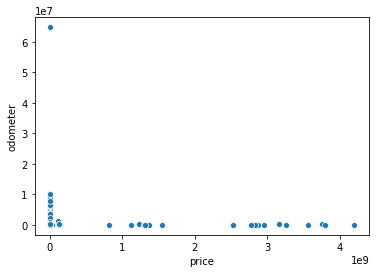

In [17]:
sns.scatterplot(data['price'], data['odometer'])

# Top 5 brands cars per year

In [18]:
perc = data.loc[:,["year","manufacturer",'price']]
perc['mean_price'] = perc.groupby([perc.manufacturer,perc.year])['price'].transform('mean')
perc.drop('price', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[perc['year'].astype('float')>=2000.0]
perc = perc.sort_values("year",ascending = False)
top_brand = ['toyota','ford','lexus','hyundai',"honda"] 
perc = perc.loc[perc['manufacturer'].isin(top_brand)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig=px.bar(perc,x='manufacturer', y="mean_price", animation_frame="year", 
           animation_group="manufacturer", color="manufacturer", hover_name="manufacturer")
fig.show()

# Which transmission is most priced? -----> automatic

Before moving on to the answer of this question lets first understand what transmission of a car means.

A quick google search gave this result:

A transmission is another name for a car's gearbox, the component that turns the engine's power into something the car can use. Simply, without it, you'd sit in your car with the engine running, going nowhere.

In [19]:
trans = data.loc[:,['price','transmission']]
trans = trans.groupby('transmission')['price'].max().reset_index()
trans  = trans.sort_values("price")
fig = px.pie(trans,
             values="price",
             names="transmission",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [20]:
data.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc,35.7636,-78.7443
1,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,nc,NaN,NaN
2,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc,36.1032,-79.8794


In [21]:
data['region'].value_counts()

fayetteville        4131
springfield         3985
rochester           3819
columbus            3589
jacksonville        3541
                    ... 
southwest MS          38
susanville            37
ogden-clearfield      16
st louis               4
kansas city            4
Name: region, Length: 403, dtype: int64

# Which region is most cars scraped?-----> Fayetteville

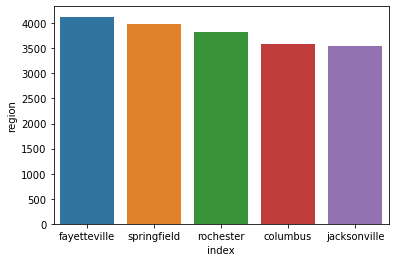

In [22]:
top_regions = data['region'].value_counts().head().reset_index()
sns.barplot(top_regions['index'], top_regions['region'])

Was pretty much bored doing the same pie charts so went with the old bar charts this time.

Will again continue in the next version.